# 1. Get Time

In [2]:
from time import gmtime, strftime
strftime("%Y-%m-%d %H:%M:%S", gmtime()) # don't forget to add 3 hours

'2016-07-21 14:50:50'

# 2. Get all names from folder

In [3]:
test = !ls test
print(test)

['0.tif', '1.tif', '10.tif', '11.tif', '12.tif', '13.tif', '14.tif', '15.tif', '16.tif', '17.tif', '18.tif', '19.tif', '9.tif']


# 3. Constants
### Big picture: 580x420 = 243600
### Small picture: 145x105 = 15225

# 4. Get operation time

In [4]:
%timeit [i**2 for i in range(1000)]

1000 loops, best of 3: 990 µs per loop


# 5. Open picture

In [6]:
import numpy as np
from PIL import Image
im = Image.open('train/1_1_mask.tif')
imarray = np.array(im)

# 6. Open and show picture

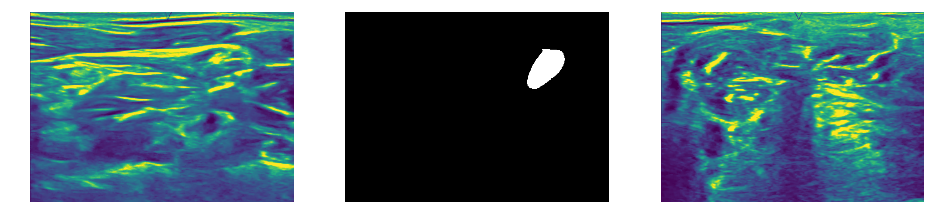

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

train_image1 = plt.imread('train/1_1.tif')
train_mask1 = plt.imread('train/1_1_mask.tif')
test_image1 = plt.imread('test/1.tif')

fig, ax = plt.subplots(1, 3)
for a in ax.reshape(3): a.axis('off')
fig.set_size_inches(16, 8)

ax[0].imshow(train_image1, cmap='viridis')
ax[1].imshow(train_mask1, cmap='Greys_r')
ax[2].imshow(test_image1, cmap='viridis')

# 7. KDTree

In [11]:
from scipy.spatial import KDTree
x = np.array([1,1])
points = np.array([[0, 0], [2, 3], [0, 4]])
tree = KDTree(points, leafsize=20)
print(tree.data)
print(tree.query(x, k=2, p=2))

[[0 0]
 [2 3]
 [0 4]]
(array([ 1.41421356,  2.23606798]), array([0, 1]))


# 8. Get answers from [train_masks.csv]

In [12]:
import csv
answers = {}
with open("train_masks.csv") as train_masks:
    reader = csv.reader(train_masks)
    for row in reader:
        answers[str(row[0]) + "_" + str(row[1]) + ".tif"] = row[2]

# 9. Write result (must be sorted)

In [13]:
result = []
with open("submission.csv", "w") as submission:
    writer = csv.writer(submission)
    writer.writerow(['img', 'pixels'])
    writer.writerows(result)